# Fashion mnist dataset
* 60K training data set, 10K test data set
* Each image is a 28x28 grayscale image
* 10 labels


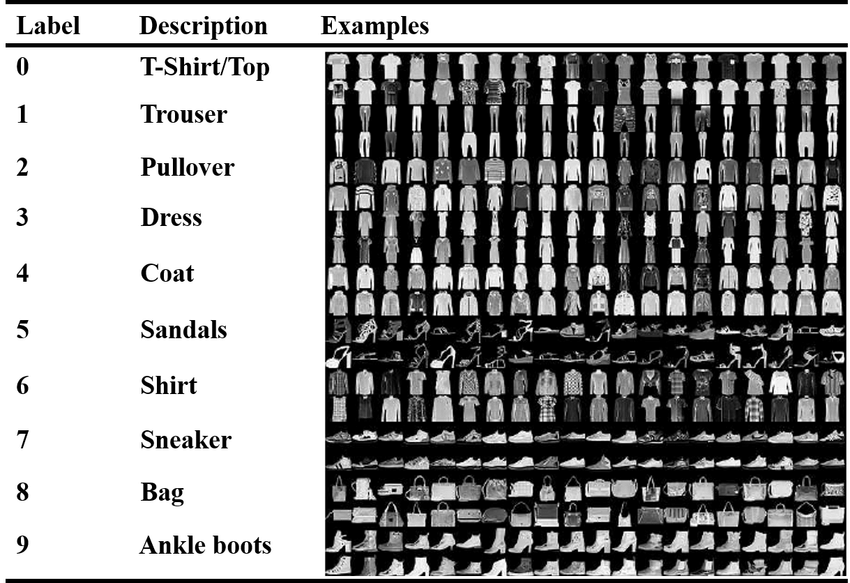

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## STEP 1: Pre processing

#### Load fashion-mnist data set from keras

In [119]:
from tensorflow.keras.datasets import fashion_mnist

In [120]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#### Check input data characteristics - shape, min, max

In [121]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [122]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

#### Input image is a gray scale

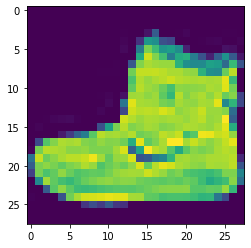

In [123]:
#visualize input data
plt.imshow(x_train[0])

In [124]:
y_train[0]

9

In [125]:
x_train.min(), x_train.max()

(0, 255)

In [126]:
x_test.min(), x_test.max()

(0, 255)

#### scaling the input data

In [127]:
x_train = x_train/255
x_test = x_test/255

#### reshape input data to match with CNN model inputs 

In [128]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_train.shape

(60000, 28, 28, 1)

#### one-hot encoding for categorical labels

In [129]:
from tensorflow.keras.utils import to_categorical

In [130]:
y_train = to_categorical(y_train)

In [131]:
y_train.shape

(60000, 10)

In [132]:
y_test_labels = y_test

In [133]:
y_test_labels.shape

(10000,)

In [134]:
y_test = to_categorical(y_test)

In [135]:
y_test.shape

(10000, 10)

#### variables to be used in next stages - image shape, number of classes

In [136]:
_img_shape = x_train[0].shape
_num_classes = y_train.shape[1]
_num_train_data = y_train.shape[0] 
_num_test_data = y_test.shape[0]

## STEP 2 : Model creation

Conv(3,3)32 pool(2,2) -> Conv(3,3)64 pool(2,2) -> Conv(3,3)64 pool(2,2) -> Flatten -> Dense(128) -> Dense(1) 0/p

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [138]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = _img_shape))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(_num_classes, activation = 'softmax'))

model.compile(optimizer = 'adam', metrics = [['accuracy']], loss = 'categorical_crossentropy')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

## STEP 3: Model training

#### Early stopping call back

In [139]:
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
callback_earlystop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 2)

#### Tensorboard visualization call back

In [141]:
from tensorflow.keras.callbacks import TensorBoard

In [142]:
log_path = '05_cnn_fashion_mnist\\logs\\fit'
callback_tensorboard = TensorBoard(log_dir = log_path,
                                  histogram_freq = 1,
                                  write_graph = True,
                                  write_images = True,
                                  update_freq = 'epoch',
                                  profile_batch = 2)

#### Train model

In [143]:
model.fit(x_train, y_train, batch_size = 128, 
        epochs = 20, verbose = 1, 
        callbacks = [callback_earlystop, callback_tensorboard],
        validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 44s 731us/sample - loss: 0.5410 - accuracy: 0.8135 - val_loss: 0.3542 - val_accuracy: 0.8712
Epoch 2/20
60000/60000 [==============================] - 41s 675us/sample - loss: 0.3527 - accuracy: 0.8756 - val_loss: 0.3078 - val_accuracy: 0.8890
Epoch 3/20
60000/60000 [==============================] - 41s 677us/sample - loss: 0.3068 - accuracy: 0.8912 - val_loss: 0.2773 - val_accuracy: 0.8961
Epoch 4/20
60000/60000 [==============================] - 41s 677us/sample - loss: 0.2819 - accuracy: 0.8985 - val_loss: 0.2628 - val_accuracy: 0.9032
Epoch 5/20
60000/60000 [==============================] - 42s 693us/sample - loss: 0.2626 - accuracy: 0.9056 - val_loss: 0.2576 - val_accuracy: 0.9051
Epoch 6/20
60000/60000 [==============================] - 41s 678us/sample - loss: 0.2461 - accuracy: 0.9119 - val_loss: 0.2629 - val_accuracy: 0.9036
Epoch 7/20
60000/60000 [====================

#### Visualize model training summary

In [154]:
model_hist_df = pd.DataFrame(model.history.history)
model_hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.541046,0.813517,0.354219,0.8712
1,0.352714,0.875633,0.307750,0.8890
2,0.306798,0.891233,0.277335,0.8961
3,0.281928,0.898483,0.262835,0.9032
4,0.262613,0.905600,0.257636,0.9051
5,0.246127,0.911867,0.262874,0.9036
6,0.235757,0.914983,0.248534,0.9079
7,0.224008,0.918283,0.243550,0.9125
8,0.211865,0.922767,0.234372,0.9138
9,0.201169,0.925100,0.241736,0.9137


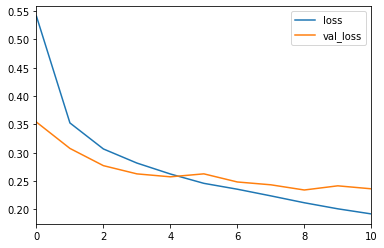

In [155]:
model_hist_df[['loss', 'val_loss']].plot()

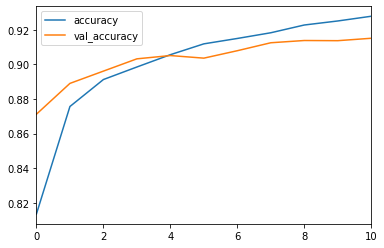

In [157]:
model_hist_df[['accuracy', 'val_accuracy']].plot()

## STEP 4: Model evaluation

#### Model evaluation on test data

In [159]:
model.evaluate(x_test, y_test, verbose = 0)

[0.23647356087565422, 0.9151]

In [162]:
model.metrics_names

['loss', 'accuracy']

#### Predict test set labels

In [163]:
y_pred = model.predict_classes(x_test)

In [166]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [165]:
from sklearn.metrics import classification_report, confusion_matrix

In [168]:
print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.87      0.87      1000
           3       0.94      0.90      0.92      1000
           4       0.84      0.89      0.86      1000
           5       0.98      0.99      0.99      1000
           6       0.76      0.74      0.75      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [170]:
print(confusion_matrix(y_test_labels, y_pred))

[[855   0  16  10   6   1 103   0   9   0]
 [  0 981   1   9   4   0   3   0   2   0]
 [ 15   0 873   7  53   0  52   0   0   0]
 [ 13   6  12 903  31   0  32   0   3   0]
 [  1   0  47  17 892   0  43   0   0   0]
 [  0   0   0   0   0 986   0   8   0   6]
 [ 94   1  66  18  78   0 737   0   6   0]
 [  0   0   0   0   0   6   0 979   1  14]
 [  2   0   1   1   3   2   4   3 984   0]
 [  0   0   0   0   0   7   1  31   0 961]]


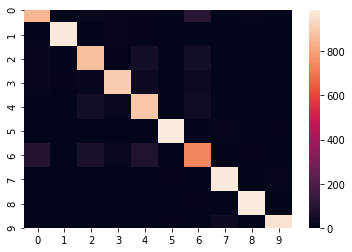

In [172]:
sns.heatmap(confusion_matrix(y_test_labels, y_pred))

#### predict output label for a single input image

In [182]:
input_image = x_train[0]
input_image.shape

(28, 28, 1)

In [183]:
#reshape input image with number of examples info
input_image = np.expand_dims(input_image, axis = 0) 
input_image.shape

(1, 28, 28, 1)

In [184]:
output_label = y_train[0]
output_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [185]:
output_pred = model.predict_classes(input_image)
output_pred = to_categorical(output_pred)

In [186]:
output_label == output_pred

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

## Good Bye !! 